# Rotating Coild Data Analysis for SI Q30Magnets

## Import libraries and Load measurement data

In [1]:
import sys
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')

%matplotlib notebook

import matplotlib.pyplot as plt
from lnls.rotcoil import *

In [2]:
# Define serial numbers, one for each magnet

serials = [
    '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', 
    '014', '015', '016', '017', 
    '018', # +0.5% integrated quadrupole
    '019', '020', '021', '022', '023',
    '024', '025', '026', '027', '028', '029', '030', '031', '032', '033',
    '034', '035', '036', 
]

# Load all data
data = MagnetsAnalysis(RotCoilMeas_SIQuadQ30, serials)
data.init()

# Print info
data.print_info()

index: 00, serial_number: 004, data sets: ['M1']
index: 01, serial_number: 005, data sets: ['M1']
index: 02, serial_number: 006, data sets: ['M1']
index: 03, serial_number: 007, data sets: ['M1']
index: 04, serial_number: 008, data sets: ['M1']
index: 05, serial_number: 009, data sets: ['M1']
index: 06, serial_number: 010, data sets: ['M1']
index: 07, serial_number: 011, data sets: ['M1']
index: 08, serial_number: 012, data sets: ['M1']
index: 09, serial_number: 013, data sets: ['M1']
index: 10, serial_number: 014, data sets: ['M1']
index: 11, serial_number: 015, data sets: ['M1']
index: 12, serial_number: 016, data sets: ['M1']
index: 13, serial_number: 017, data sets: ['M1']
index: 14, serial_number: 018, data sets: ['M1']
index: 15, serial_number: 019, data sets: ['M1']
index: 16, serial_number: 020, data sets: ['M1']
index: 17, serial_number: 021, data sets: ['M1']
index: 18, serial_number: 022, data sets: ['M1']
index: 19, serial_number: 023, data sets: ['M1']
index: 20, serial_nu

## Maximum Integrated Quadrupole

In [3]:
# gets integrated strength at maximum current for all magnets
data.main_intmpole_at_max_current('M1')

index:00, serial:004, idx:12, max_current:  +154.9970 [A], diff_spec: -0.05 [%]
index:01, serial:005, idx:12, max_current:  +154.9966 [A], diff_spec: +0.13 [%]
index:02, serial:006, idx:12, max_current:  +154.9967 [A], diff_spec: -0.02 [%]
index:03, serial:007, idx:12, max_current:  +154.9972 [A], diff_spec: -0.02 [%]
index:04, serial:008, idx:12, max_current:  +154.9981 [A], diff_spec: +0.09 [%]
index:05, serial:009, idx:12, max_current:  +154.9966 [A], diff_spec: +0.04 [%]
index:06, serial:010, idx:12, max_current:  +154.9957 [A], diff_spec: -0.02 [%]
index:07, serial:011, idx:37, max_current:  +154.9965 [A], diff_spec: +0.03 [%]
index:08, serial:012, idx:12, max_current:  +154.9965 [A], diff_spec: -0.05 [%]
index:09, serial:013, idx:12, max_current:  +154.9976 [A], diff_spec: +0.08 [%]
index:10, serial:014, idx:12, max_current:  +154.9981 [A], diff_spec: +0.04 [%]
index:11, serial:015, idx:12, max_current:  +154.9967 [A], diff_spec: +0.00 [%]
index:12, serial:016, idx:12, max_curren

<IPython.core.display.Javascript object>


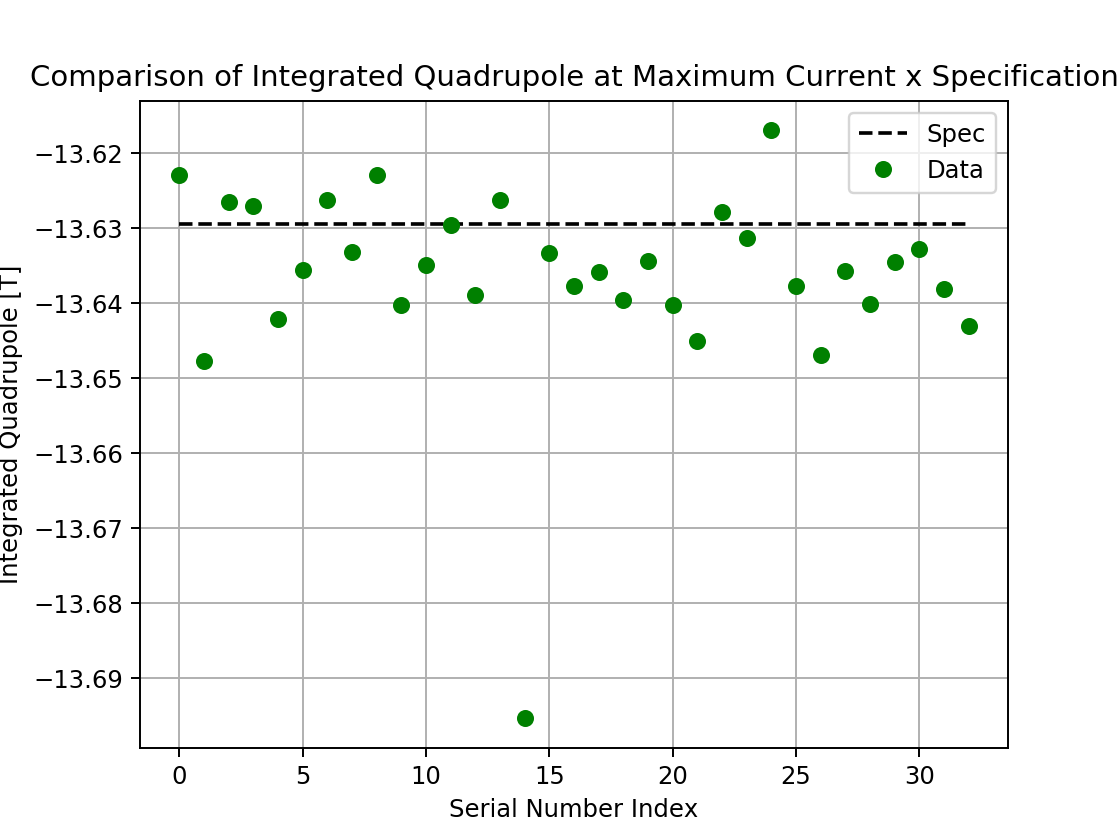

In [4]:
# plot data comparison with spec
plt.figure()
data.main_intmpole_at_max_current_plot(plt)
plt.show()

## Magnetic Center

<IPython.core.display.Javascript object>


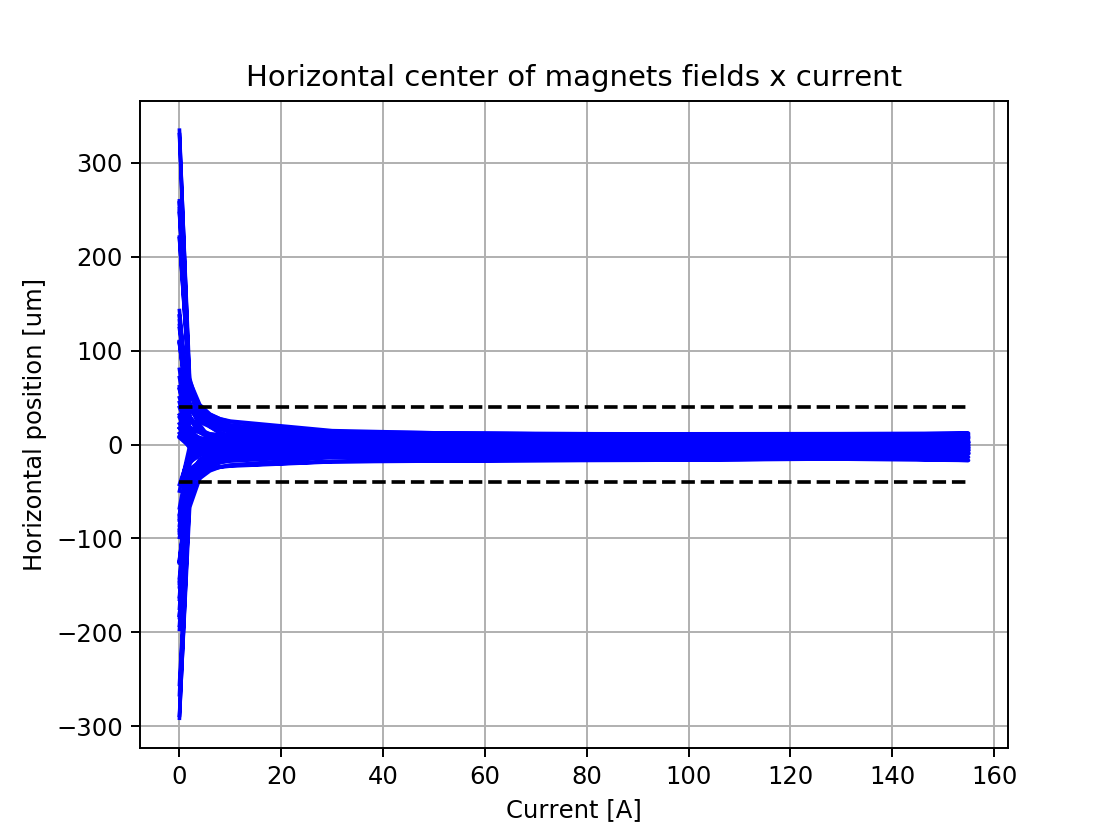

Horizontal center at maximum current [um]: -1.66 ± 6.92


<IPython.core.display.Javascript object>


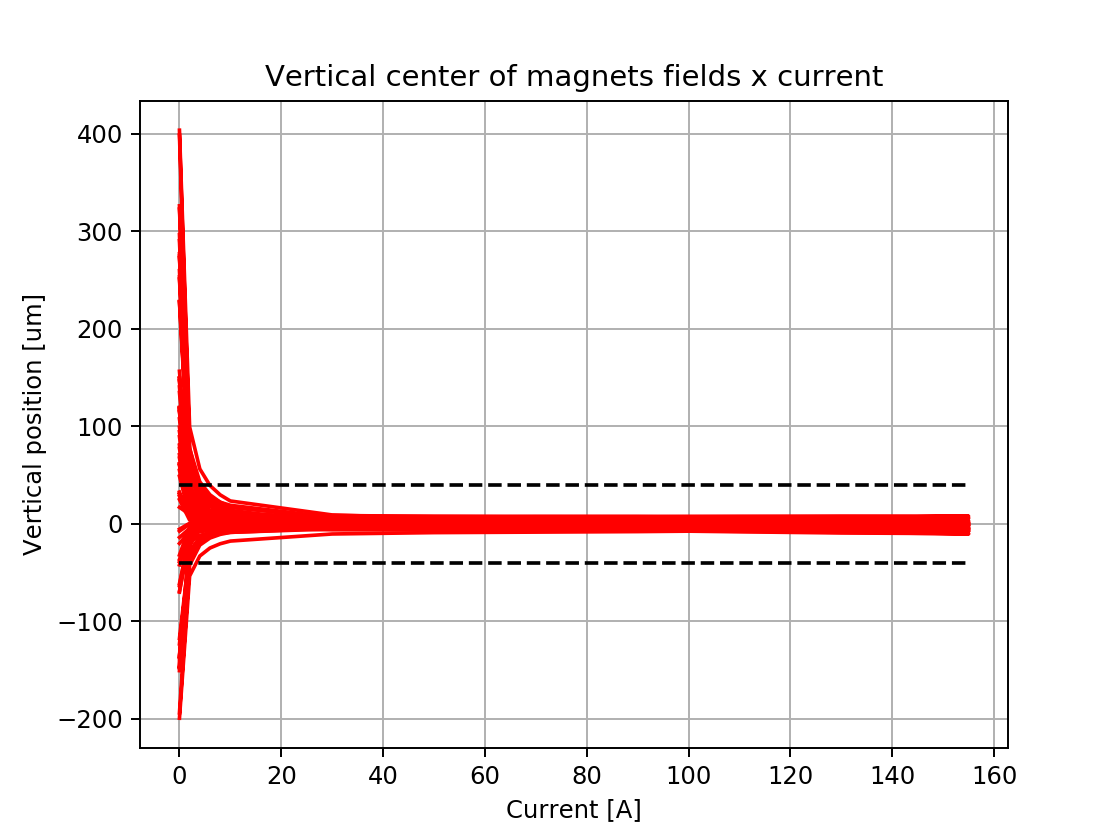

Vertical center at maximum current [um]: -2.49 ± 4.45


In [5]:
# Horizontal center for all magnets x currents
plt.figure()
data.magnetic_center_direction_plot('M1', 'X', plt)
plt.show()

# Vertical center for all magnets y currents
plt.figure()
data.magnetic_center_direction_plot('M1', 'Y', plt)
plt.show()

<IPython.core.display.Javascript object>


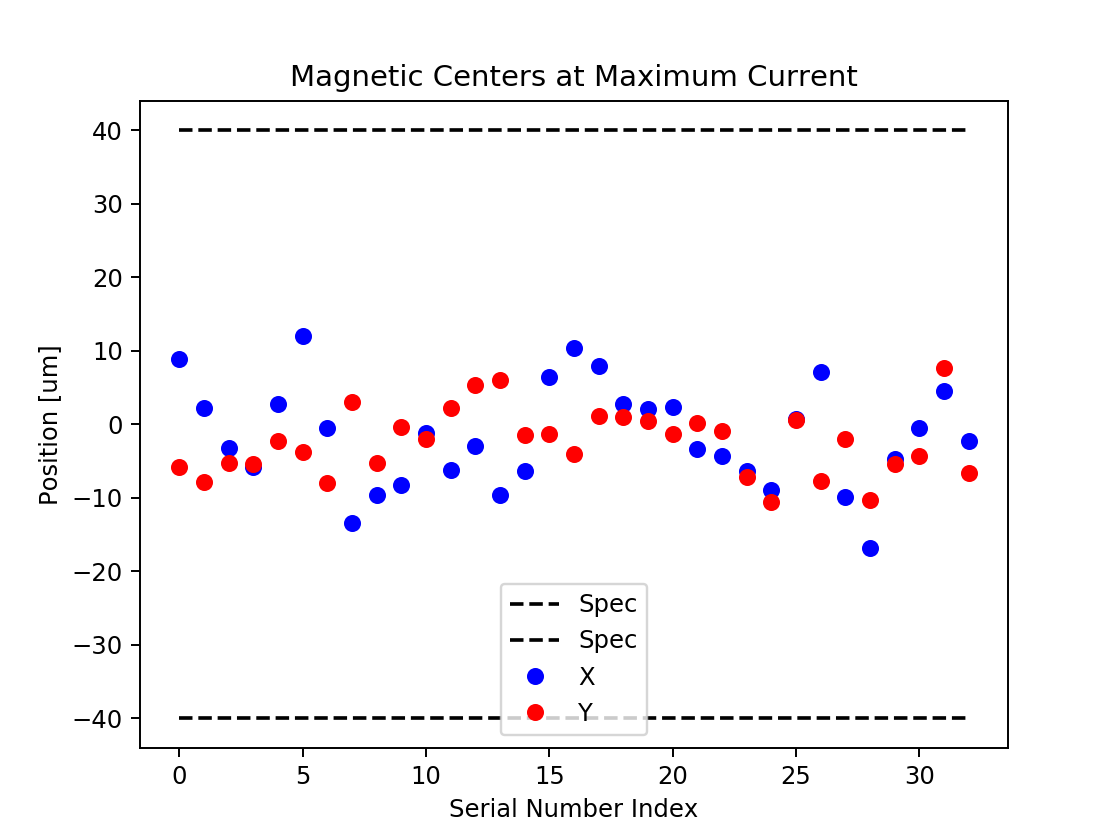

<IPython.core.display.Javascript object>


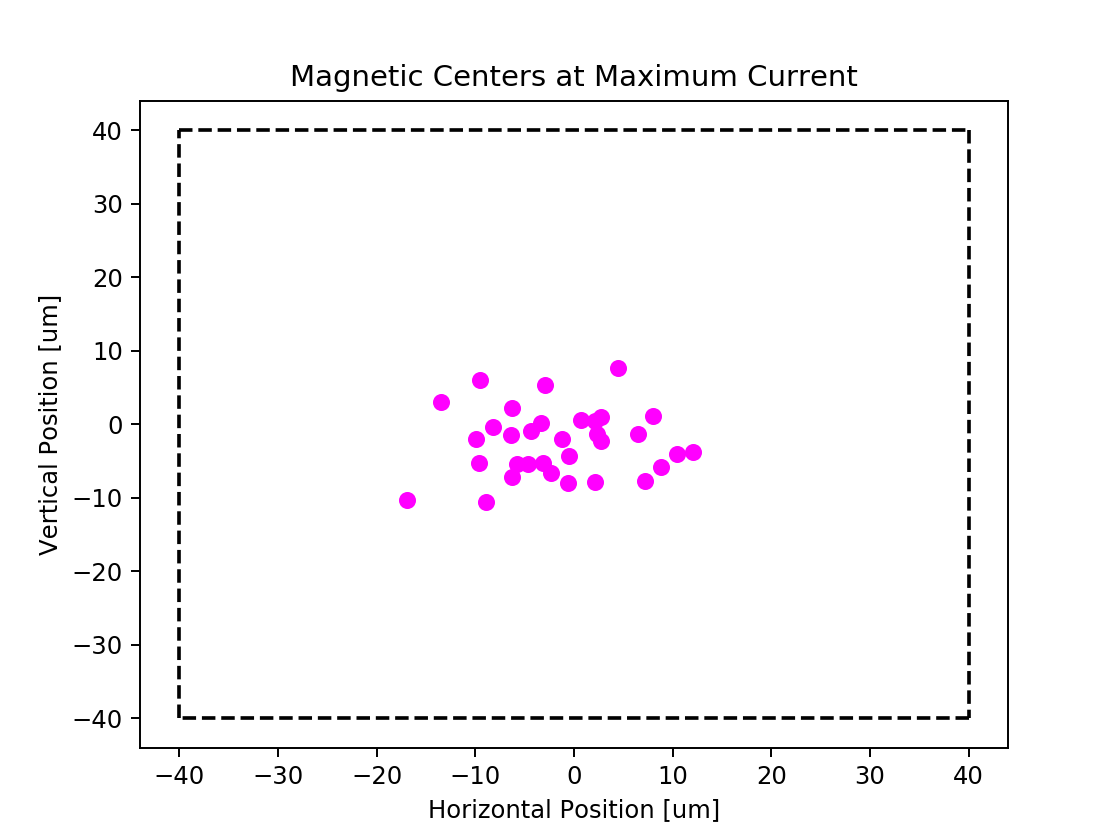

In [6]:
# Horizontal and vertical positions of all magnets
plt.figure()
data.magnetic_center_plot('M1', plt)
plt.show()

# Transverse plane positions
plt.figure()
data.magnetic_center_transverse_plot('M1', plt)
plt.show()

## Ramp Up

<IPython.core.display.Javascript object>


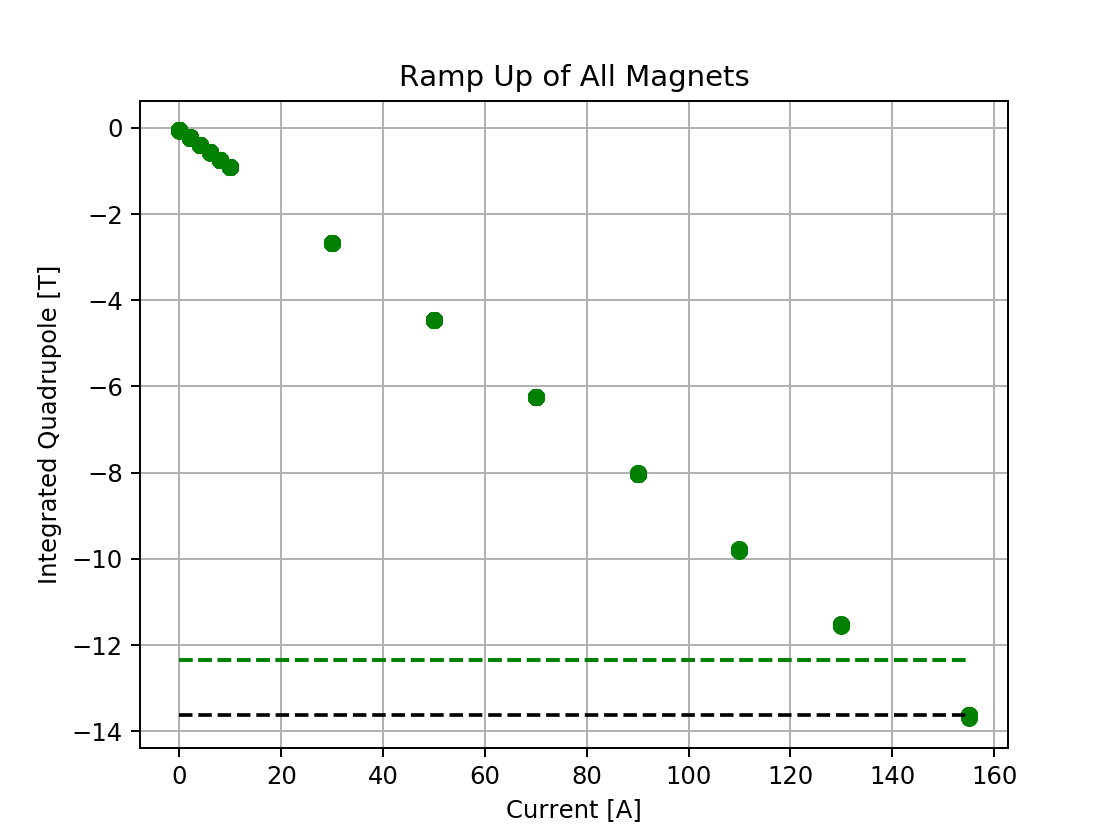

Nominal Integrated Quadrupole [T]:
SI-Fam:MA-QFB   : -12.352970
SI-Fam:MA-QFP   : -12.352970

SI-Fam:MA-QFB  : 139.9 A
SI-Fam:MA-QFP  : 139.9 A


In [7]:
# Plot rampup integrated strength of main multipole and compare it to nominal values and maximum spec

plt.figure()
data.rampup_excitation_curve_plot('M1', plt)
plt.show()

# Print currents for nominal strengths
print()
d = data.tmpl.get_nominal_main_intmpole_values(3.0)
for fam, gl in d.items():
    c = data.tmpl.rampup_main_mpole_2_curr('M1', gl)
    print('{:<15s}: {:05.1f} A'.format(fam, c))

<IPython.core.display.Javascript object>


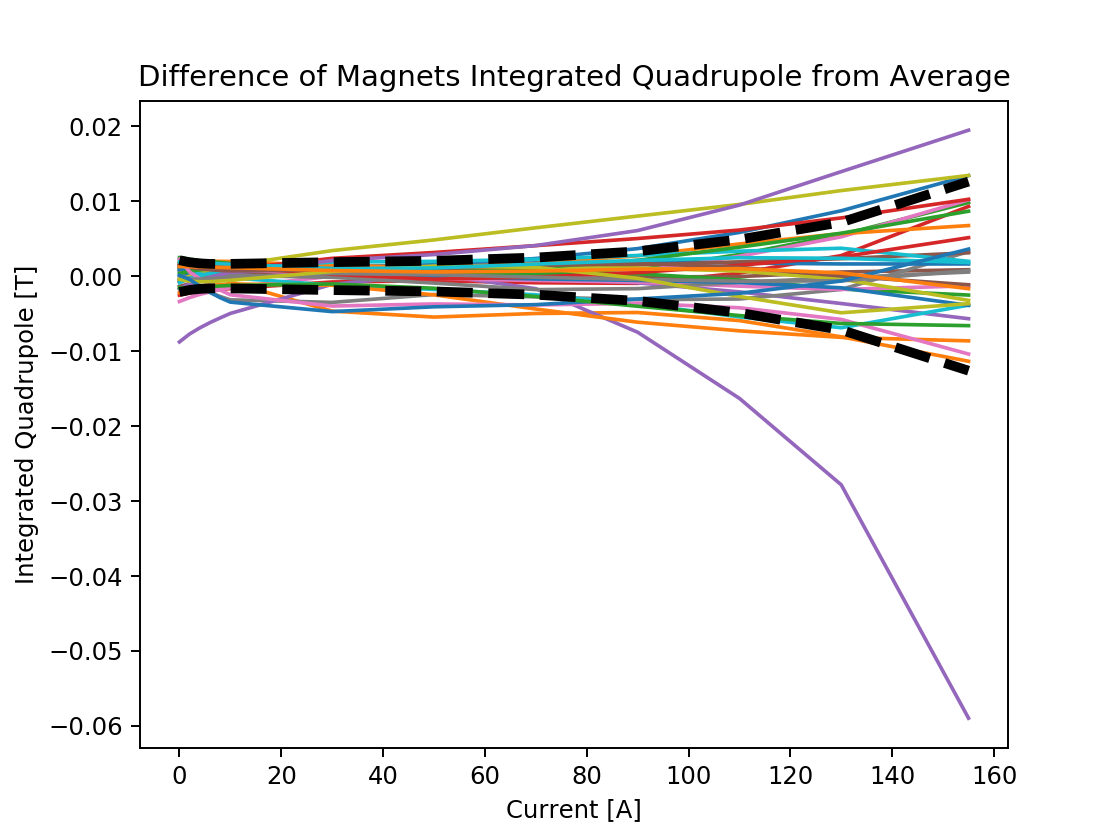

In [8]:
# Plot rampup dispersion amongst magnets

# Q30-018 is off.

plt.figure()
data.rampup_excitation_curve_dispersion_plot('M1', plt)
plt.show()

In [9]:
# Print random integrated main strength for various currents

data.rampup_excitation_curve_rms_error_print('M1')

current 00:   +0.001 [A], rms_error:  3.7159 [%], max_error: 15.3634 [%]
current 01:   +1.996 [A], rms_error:  0.8194 [%], max_error:  3.4229 [%]
current 02:   +3.998 [A], rms_error:  0.4300 [%], max_error:  1.7446 [%]
current 03:   +5.997 [A], rms_error:  0.2877 [%], max_error:  1.0915 [%]
current 04:   +7.996 [A], rms_error:  0.2188 [%], max_error:  0.7519 [%]
current 05:   +9.996 [A], rms_error:  0.1793 [%], max_error:  0.5433 [%]
current 06:  +29.996 [A], rms_error:  0.0696 [%], max_error:  0.1750 [%]
current 07:  +49.995 [A], rms_error:  0.0459 [%], max_error:  0.1222 [%]
current 08:  +69.996 [A], rms_error:  0.0397 [%], max_error:  0.1033 [%]
current 09:  +89.997 [A], rms_error:  0.0412 [%], max_error:  0.1002 [%]
current 10: +109.995 [A], rms_error:  0.0500 [%], max_error:  0.1668 [%]
current 11: +129.997 [A], rms_error:  0.0623 [%], max_error:  0.2415 [%]
current 12: +154.997 [A], rms_error:  0.0925 [%], max_error:  0.4324 [%]


<IPython.core.display.Javascript object>


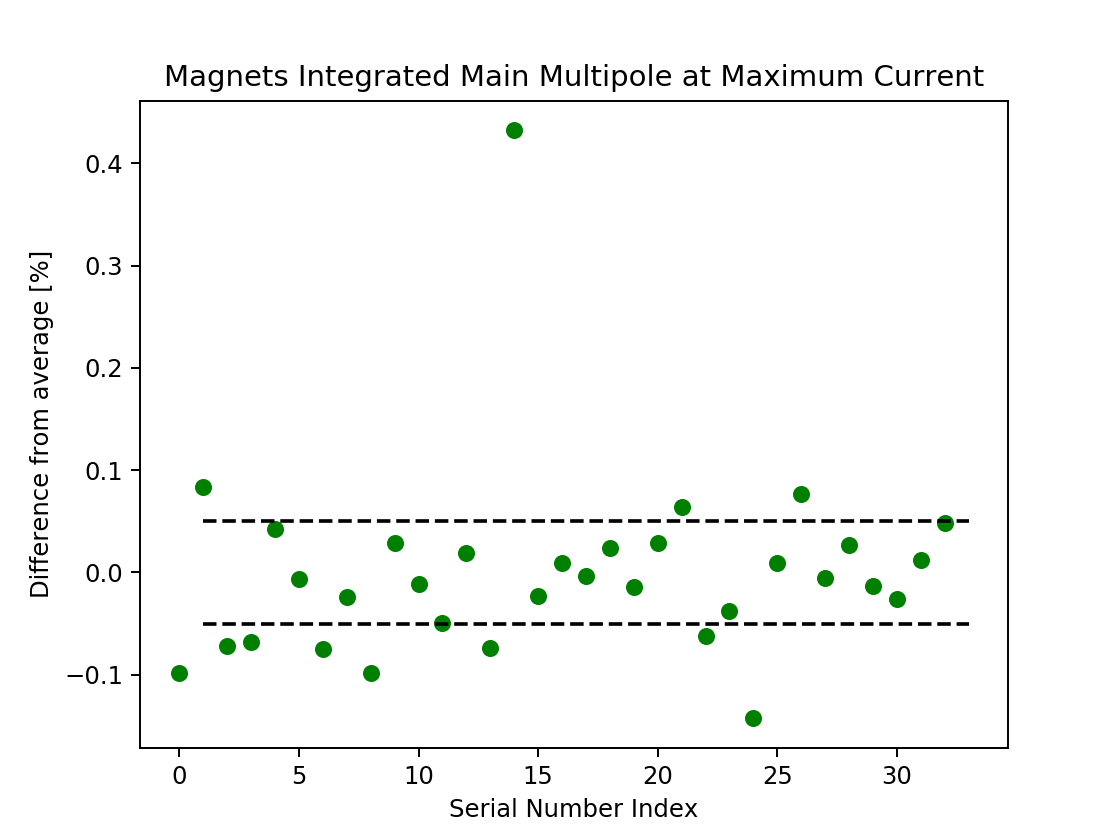

In [10]:
# Plot Integrated Quadrupole Error for maximum current

plt.figure()
data.rampup_excitation_curve_rms_error_plot(plt)
plt.show()

# Gradient Roll Error

<IPython.core.display.Javascript object>


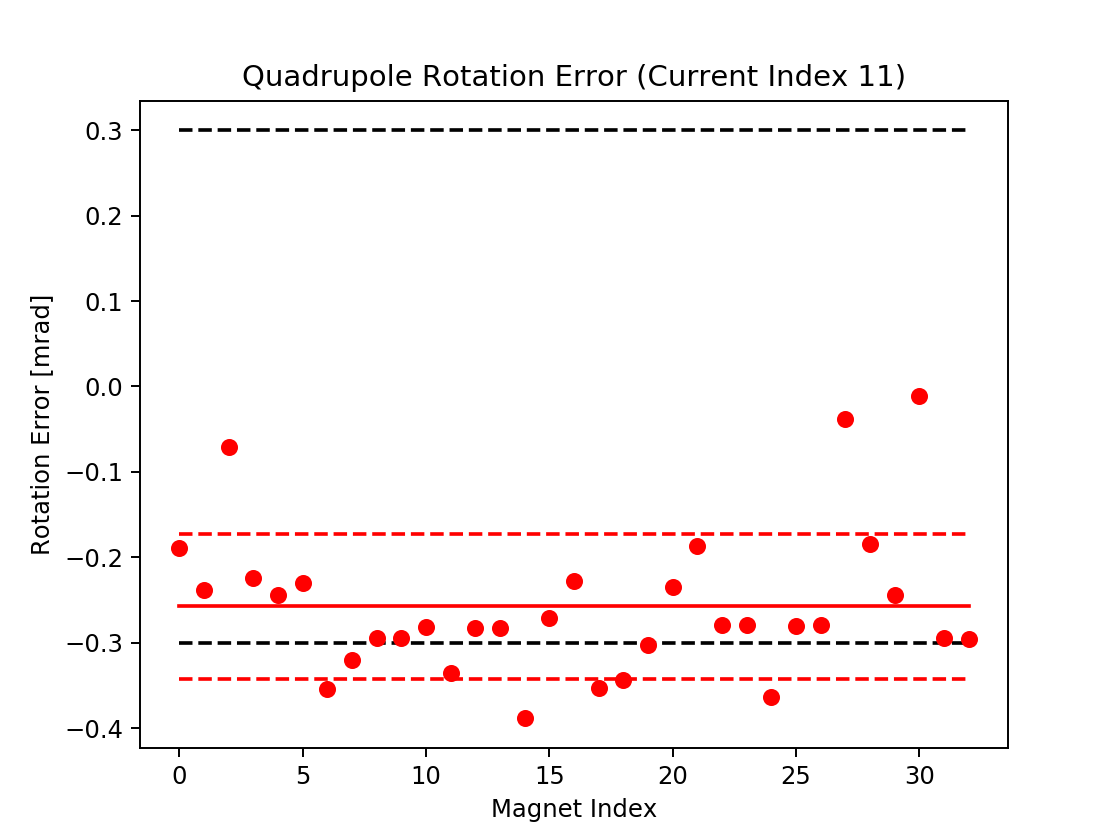

Angle error (Spec): +0.300 mrad
Angle error (Avg) : -0.258 mrad
Angle error (Std) : +0.085 mrad


In [11]:
curr_idx = 11  # [130A, nominal QFB, QFP]

plt.figure()
spec, avg, std = data.rotation_error_plot('M1', plt, curr_idx)
print('Angle error (Spec): {:+.3f} mrad'.format(spec))
print('Angle error (Avg) : {:+.3f} mrad'.format(avg))
print('Angle error (Std) : {:+.3f} mrad'.format(std))

## Hysteresis

<IPython.core.display.Javascript object>


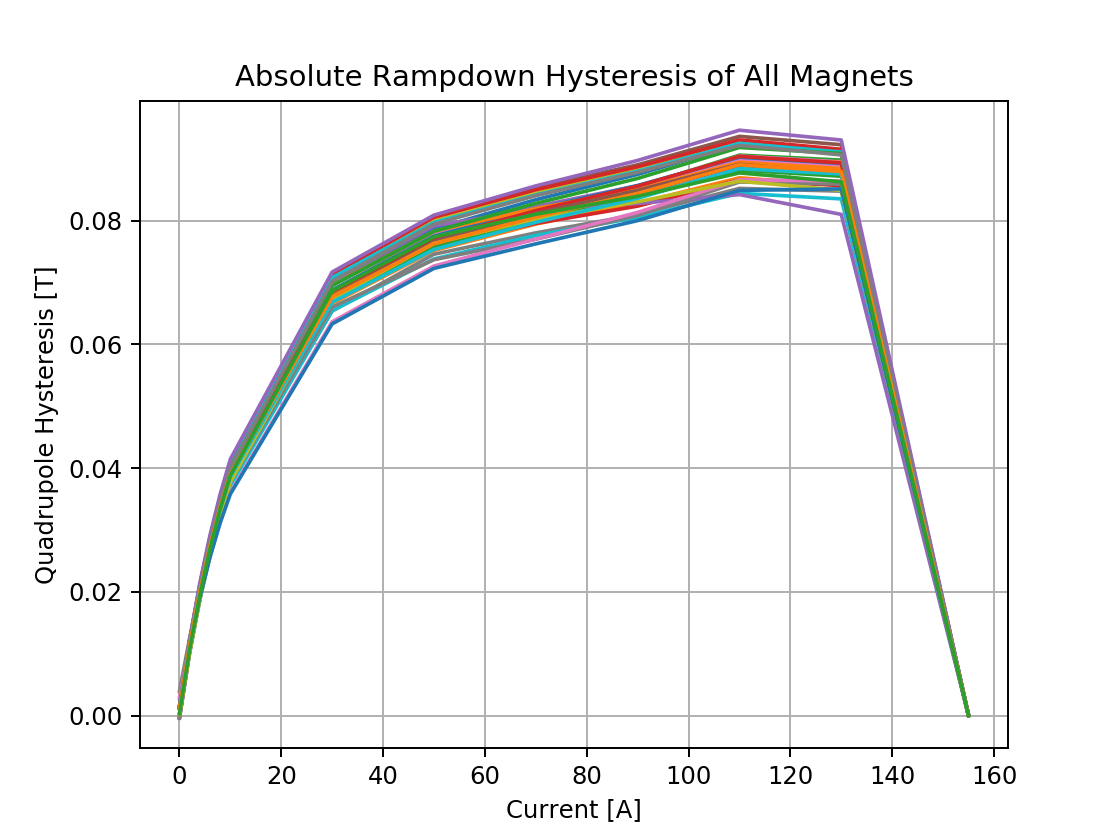

<IPython.core.display.Javascript object>


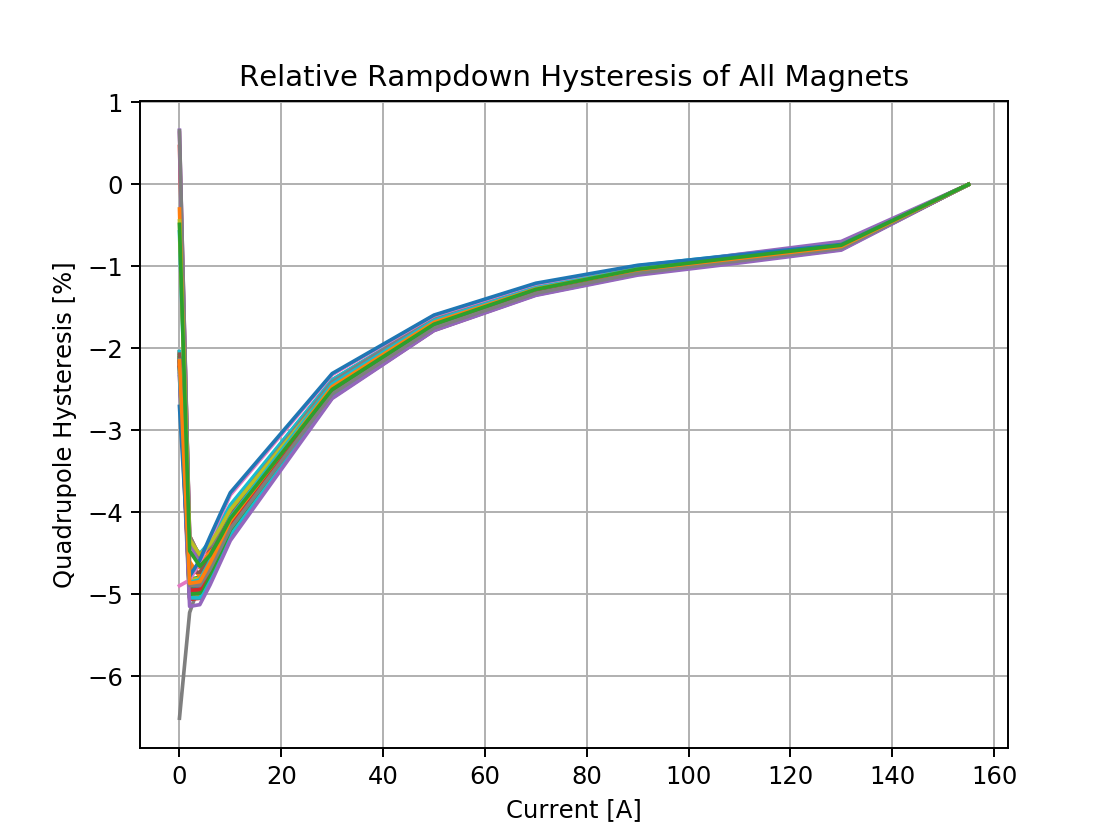

In [13]:
# Absolute
plt.figure()
data.hysteresis_absolute_plot('M1', plt)
plt.show()

# Relative
plt.figure()
data.hysteresis_relative_plot('M1', plt)
plt.show()

## Save Excitation Data Files

In [15]:
# save average excitation data to file

data.save_excdata_average('M1')

In [16]:
# save excitation data of all magnets to separate files
data.save_excdata_individuals('M1')

## Multipoles

<IPython.core.display.Javascript object>


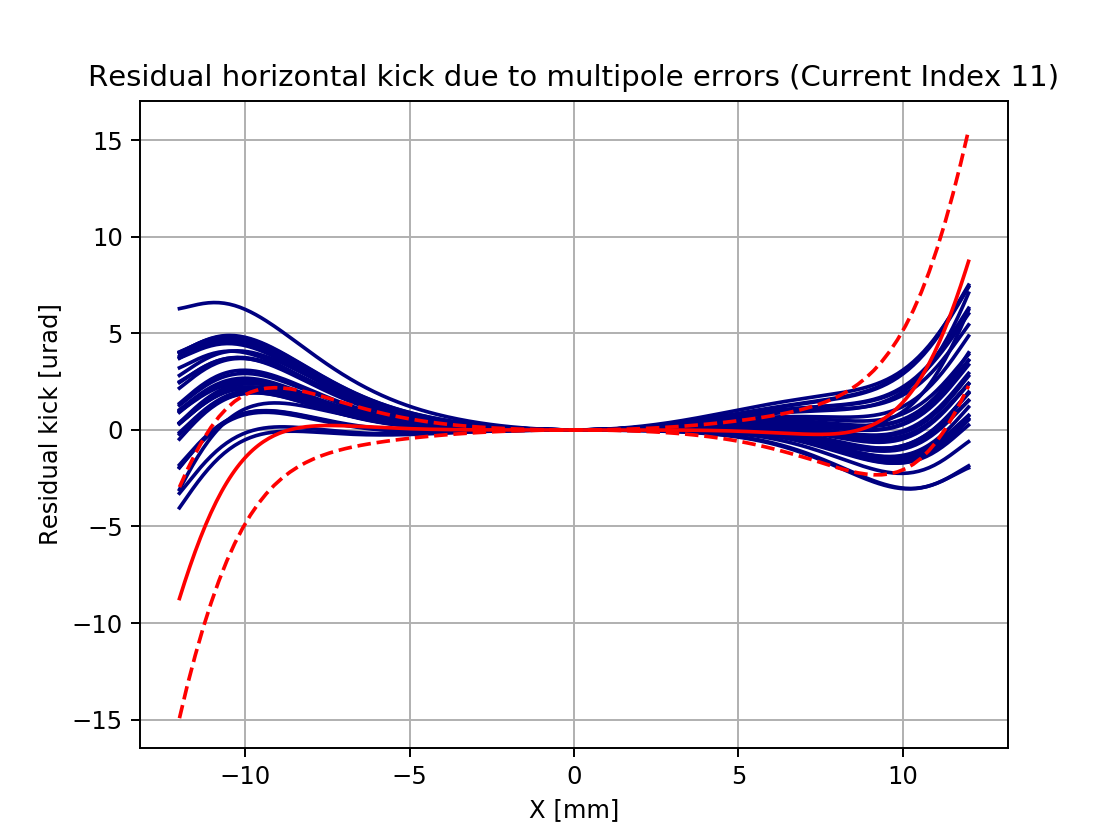

In [14]:
# Horizontal kick

curr_idx = 11  # [130A]
plt.figure()
data.multipole_errors_kickx_plot('M1', plt, curr_idx=curr_idx, energy=3.0)
plt.show()

<IPython.core.display.Javascript object>


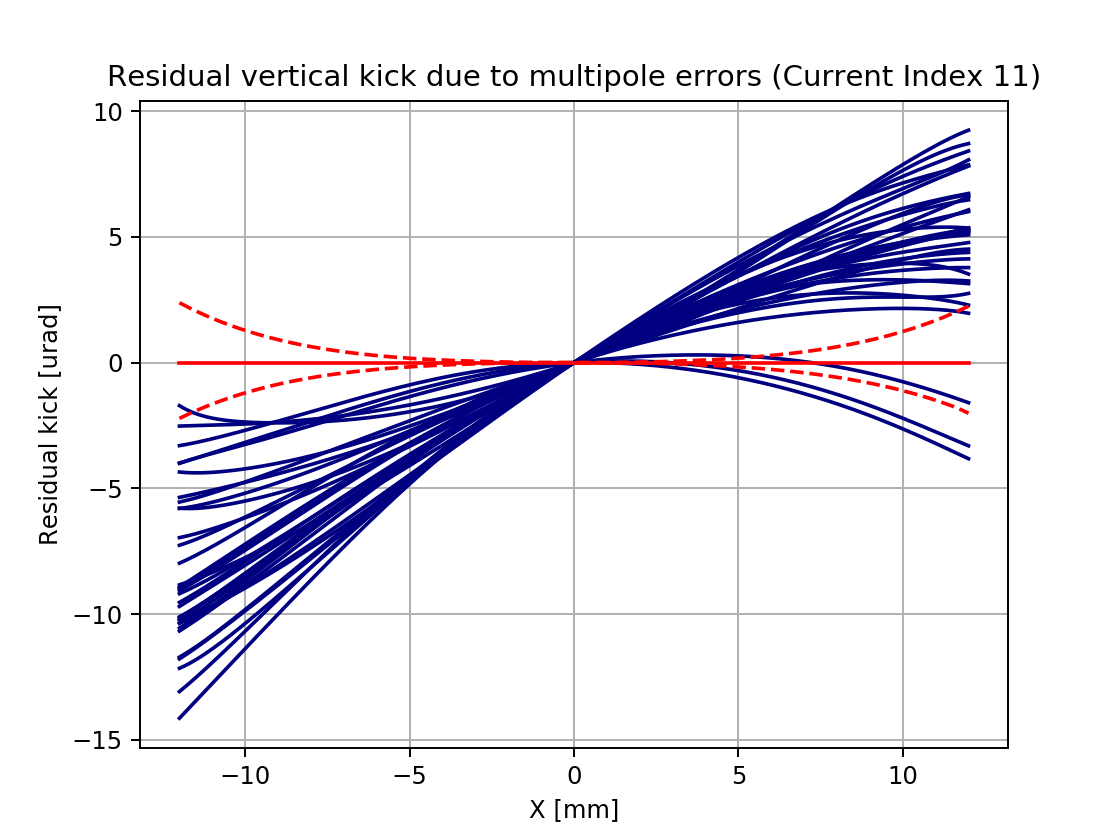

In [15]:
# Vertical kick


curr_idx = 11  # [130A]
plt.figure()
data.multipole_errors_kicky_plot('M1', plt, curr_idx=curr_idx, energy=3.0)
plt.show()

# Magnets Sorting

In [16]:
med = 'M1'
print('Rampup')
c, gl = data.tmpl.get_rampup(med)
for i in range(len(c)):
    print('{:02d}: I = {:8.4f} A => GL = {:+.4f} T'.format(i, c[i], gl[i]))

Rampup
00: I =   0.0010 A => GL = -0.0570 T
01: I =   1.9956 A => GL = -0.2249 T
02: I =   3.9980 A => GL = -0.3952 T
03: I =   5.9971 A => GL = -0.5666 T
04: I =   7.9961 A => GL = -0.7389 T
05: I =   9.9960 A => GL = -0.9122 T
06: I =  29.9953 A => GL = -2.6739 T
07: I =  49.9944 A => GL = -4.4562 T
08: I =  69.9964 A => GL = -6.2410 T
09: I =  89.9976 A => GL = -8.0199 T
10: I = 109.9953 A => GL = -9.7829 T
11: I = 129.9978 A => GL = -11.5221 T
12: I = 154.9970 A => GL = -13.6230 T


In [17]:
# Print README Files

import sys

currents, _ = data.tmpl.get_rampup('M1')

stdout = sys.stdout
for cidx in range(1,len(currents)):
    sys.stdout = open('README-{:.0f}A.md'.format(currents[cidx]), 'w')
    data.readme_print('M1', cidx)
    sys.stdout.flush()
sys.stdout = stdout

In [18]:
# Print Multipoles Files

import sys

currents, _ = data.tmpl.get_rampup('M1')

stdout = sys.stdout
for cidx in range(1,len(currents)):
    sys.stdout = open('MULTIPOLES-{:.0f}A.txt'.format(currents[cidx]), 'w')
    data.readme_multipoles_print('M1', cidx)
    sys.stdout.flush()
sys.stdout = stdout